# 파일 및 라이브러리 불러오기

In [76]:
import pandas as pd
import codecs
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
df = pd.read_excel('./t_scraped/all_reviews_final.xlsx')
df.head()

,tour_title,review_title,review_comment,review_date,review_score,trip_type
0,1.Ultimate DMZ & JSA: Private Tour along North...,A great day,Our guide Shrek was unbelievably friendly and ...,Date of experience: January 2020,5,Trip type: Traveled as a couple
1,1.Ultimate DMZ & JSA: Private Tour along North...,Pleasant and private,My wife and have attended many outings with a ...,Date of experience: December 2019,5,NaN
2,1.Ultimate DMZ & JSA: Private Tour along North...,Amazing experience! Highlight of our trip.,Our tour guide was fantastic. Very friendly an...,Date of experience: September 2019,5,NaN
3,1.Ultimate DMZ & JSA: Private Tour along North...,Fantastic tour with incredible guide!,My wife and I really enjoyed our first visit t...,Date of experience: October 2019,5,NaN
4,1.Ultimate DMZ & JSA: Private Tour along North...,Pretty awesome,The highlight was the JSA tour which was super...,Date of experience: June 2019,5,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tour_title      3381 non-null   object
 1   review_title    3381 non-null   object
 2   review_comment  3381 non-null   object
 3   review_date     2552 non-null   object
 4   review_score    3381 non-null   int64 
 5   trip_type       1987 non-null   object
 6   month           2552 non-null   object
 7   year            2552 non-null   object
dtypes: int64(1), object(7)
memory usage: 211.4+ KB


In [67]:
df['year'] = df['review_date'].str.split(' ').str[4]
df['month'] = df['review_date'].str.split(' ').str[3]
df['yearmonth'] = df['year'] + "-" + df['month']
df

,tour_title,review_title,review_comment,review_date,review_score,trip_type,month,year,yearmonth
0,1.Ultimate DMZ & JSA: Private Tour along North...,A great day,Our guide Shrek was unbelievably friendly and ...,Date of experience: January 2020,5,Trip type: Traveled as a couple,January,2020,2020-January
1,1.Ultimate DMZ & JSA: Private Tour along North...,Pleasant and private,My wife and have attended many outings with a ...,Date of experience: December 2019,5,NaN,December,2019,2019-December
2,1.Ultimate DMZ & JSA: Private Tour along North...,Amazing experience! Highlight of our trip.,Our tour guide was fantastic. Very friendly an...,Date of experience: September 2019,5,NaN,September,2019,2019-September
3,1.Ultimate DMZ & JSA: Private Tour along North...,Fantastic tour with incredible guide!,My wife and I really enjoyed our first visit t...,Date of experience: October 2019,5,NaN,October,2019,2019-October
4,1.Ultimate DMZ & JSA: Private Tour along North...,Pretty awesome,The highlight was the JSA tour which was super...,Date of experience: June 2019,5,NaN,June,2019,2019-June
...,...,...,...,...,...,...,...,...,...
3376,Winter 8 days Ski Jeju Busan Mt Seorak Seoul o...,Best guided holiday ever,"Here Korea,My family (wife and two kids) booke...",Date of experience: January 2019,5,Trip type: Traveled with family,January,2019,2019-January
3377,[Premium Private Tour] Mt Seorak & East Sea or...,Best way to see highlights of Northeast Korea ...,This review is for the Mt. Seorak and East Sea...,Date of experience: November 2020,5,NaN,November,2020,2020-November
3378,[Premium Private Tour] Mt Seorak & East Sea or...,Awesome tour,Seoraksan NP is absolutely stunning and the gu...,NaN,4,NaN,NaN,NaN,NaN
3379,[Premium Private Tour] Mt Seorak & East Sea or...,What a journey,"Our guide was awesome, super friendly and help...",Date of experience: September 2019,4,NaN,September,2019,2019-September


In [70]:
df['yearmonth'] = pd.to_datetime(df['yearmonth'], format = '%Y-%B')
df

,tour_title,review_title,review_comment,review_date,review_score,trip_type,month,year,yearmonth
0,1.Ultimate DMZ & JSA: Private Tour along North...,A great day,Our guide Shrek was unbelievably friendly and ...,Date of experience: January 2020,5,Trip type: Traveled as a couple,January,2020,2020-01-01
1,1.Ultimate DMZ & JSA: Private Tour along North...,Pleasant and private,My wife and have attended many outings with a ...,Date of experience: December 2019,5,NaN,December,2019,2019-12-01
2,1.Ultimate DMZ & JSA: Private Tour along North...,Amazing experience! Highlight of our trip.,Our tour guide was fantastic. Very friendly an...,Date of experience: September 2019,5,NaN,September,2019,2019-09-01
3,1.Ultimate DMZ & JSA: Private Tour along North...,Fantastic tour with incredible guide!,My wife and I really enjoyed our first visit t...,Date of experience: October 2019,5,NaN,October,2019,2019-10-01
4,1.Ultimate DMZ & JSA: Private Tour along North...,Pretty awesome,The highlight was the JSA tour which was super...,Date of experience: June 2019,5,NaN,June,2019,2019-06-01
...,...,...,...,...,...,...,...,...,...
3376,Winter 8 days Ski Jeju Busan Mt Seorak Seoul o...,Best guided holiday ever,"Here Korea,My family (wife and two kids) booke...",Date of experience: January 2019,5,Trip type: Traveled with family,January,2019,2019-01-01
3377,[Premium Private Tour] Mt Seorak & East Sea or...,Best way to see highlights of Northeast Korea ...,This review is for the Mt. Seorak and East Sea...,Date of experience: November 2020,5,NaN,November,2020,2020-11-01
3378,[Premium Private Tour] Mt Seorak & East Sea or...,Awesome tour,Seoraksan NP is absolutely stunning and the gu...,NaN,4,NaN,NaN,NaN,NaT
3379,[Premium Private Tour] Mt Seorak & East Sea or...,What a journey,"Our guide was awesome, super friendly and help...",Date of experience: September 2019,4,NaN,September,2019,2019-09-01


In [351]:
df[df['year'].isnull()]

,tour_title,review_title,review_comment,review_date,review_score,trip_type,month,year,yearmonth
6,1.Ultimate DMZ & JSA: Private Tour along North...,Excellent tour of DMZ/JSA with Alfonso,We had an absolutely fabulous day on this tour...,NaN,5,NaN,NaN,NaN,NaT
17,1.Ultimate DMZ & JSA: Private Tour along North...,Awesome tour!,The private DMZ Spy Tour was one of the most m...,NaN,5,NaN,NaN,NaN,NaT
23,1.Ultimate DMZ & JSA: Private Tour along North...,Outstanding!,This tour was amazing. First of all it was pri...,NaN,5,NaN,NaN,NaN,NaT
25,1.Ultimate DMZ & JSA: Private Tour along North...,A Fun History Lesson,We toured the DMZ with Don yesterday. The day ...,NaN,5,NaN,NaN,NaN,NaT
26,1.Ultimate DMZ & JSA: Private Tour along North...,Great tour!,"On a prior tour with another company, we had a...",NaN,5,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
3367,UNESCO Small Group Day Tour of Jeju Island - E...,JY was a wonderful guide!,This tour was jam packed with great experience...,NaN,5,NaN,NaN,NaN,NaT
3368,UNESCO Small Group Day Tour of Jeju Island - E...,Worth to go and see,"All good, book and enjoy! Dont forget to take ...",NaN,5,NaN,NaN,NaN,NaT
3369,UNESCO Small Group Day Tour of Jeju Island - E...,Highlights of Jeju in 1 Day,"First, THIS TOUR AGENCY DESERVES EVERY SINGLE ...",NaN,5,NaN,NaN,NaN,NaT
3375,VIP Brompton Bike & Food Tour (with Car Pick U...,Amazing tour,Incredible experience! The tour was super well...,NaN,5,NaN,NaN,NaN,NaT


In [352]:
df['year'] = df['year'].astype(float)

# 연월별 review score, review count

In [74]:
df['yearmonth'].describe()

<ipython-input-74-f9f8581c68c0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['yearmonth'].describe()


count                    2552
unique                     72
top       2019-08-01 00:00:00
freq                      217
first     2014-03-01 00:00:00
last      2021-02-01 00:00:00
Name: yearmonth, dtype: object

In [86]:
temp = df[['yearmonth','review_score']].copy()
temp['yearmonth'] = temp['yearmonth'].astype(str)

In [109]:
temp2 = temp.groupby('yearmonth')['review_score'].agg(['mean', 'count'])
temp2 = temp2.reset_index()
temp2 = temp2[temp2['yearmonth']!= 'NaT']
temp2

,yearmonth,mean,count
0,2014-03-01,5.000000,2
1,2014-06-01,5.000000,1
2,2014-08-01,5.000000,1
3,2014-10-01,5.000000,2
4,2015-02-01,5.000000,2
...,...,...,...
67,2020-09-01,5.000000,2
68,2020-10-01,4.636364,11
69,2020-11-01,5.000000,13
70,2020-12-01,5.000000,1


<AxesSubplot:xlabel='yearmonth', ylabel='mean'>

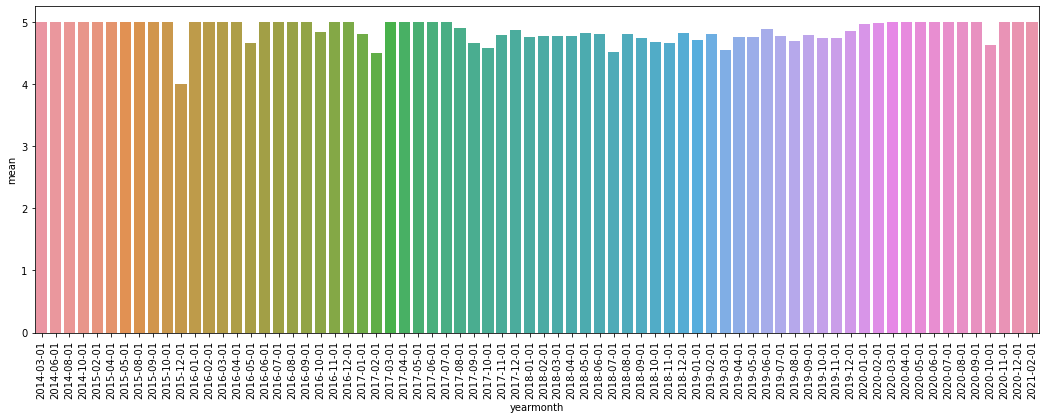

In [110]:
# 월별 평균 리뷰스코어
plt.figure(figsize=(18,6))
plt.xticks(rotation = 90)
sns.barplot(data = temp2, x = 'yearmonth', y = 'mean')

<AxesSubplot:xlabel='yearmonth', ylabel='count'>

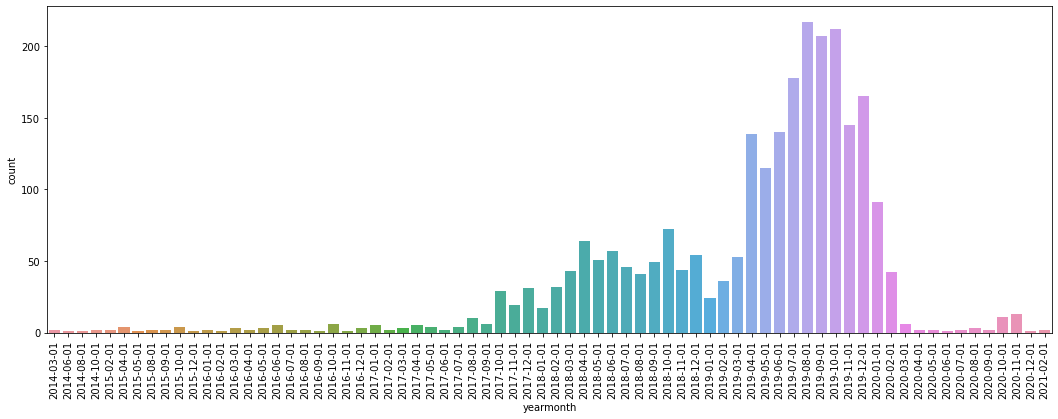

In [111]:
# 월별 리뷰건수
plt.figure(figsize=(18,6))
plt.xticks(rotation = 90)
sns.barplot(data = temp2, x = 'yearmonth', y = 'count')

# positive/negative 리뷰 분류

In [365]:
positive_review = df[df['review_score']>=4]
positive_review

,tour_title,review_title,review_comment,review_date,review_score,trip_type,month,year,yearmonth
0,1.Ultimate DMZ & JSA: Private Tour along North...,A great day,Our guide Shrek was unbelievably friendly and ...,Date of experience: January 2020,5,Trip type: Traveled as a couple,January,2020.0,2020-01-01
1,1.Ultimate DMZ & JSA: Private Tour along North...,Pleasant and private,My wife and have attended many outings with a ...,Date of experience: December 2019,5,NaN,December,2019.0,2019-12-01
2,1.Ultimate DMZ & JSA: Private Tour along North...,Amazing experience! Highlight of our trip.,Our tour guide was fantastic. Very friendly an...,Date of experience: September 2019,5,NaN,September,2019.0,2019-09-01
3,1.Ultimate DMZ & JSA: Private Tour along North...,Fantastic tour with incredible guide!,My wife and I really enjoyed our first visit t...,Date of experience: October 2019,5,NaN,October,2019.0,2019-10-01
4,1.Ultimate DMZ & JSA: Private Tour along North...,Pretty awesome,The highlight was the JSA tour which was super...,Date of experience: June 2019,5,NaN,June,2019.0,2019-06-01
...,...,...,...,...,...,...,...,...,...
3376,Winter 8 days Ski Jeju Busan Mt Seorak Seoul o...,Best guided holiday ever,"Here Korea,My family (wife and two kids) booke...",Date of experience: January 2019,5,Trip type: Traveled with family,January,2019.0,2019-01-01
3377,[Premium Private Tour] Mt Seorak & East Sea or...,Best way to see highlights of Northeast Korea ...,This review is for the Mt. Seorak and East Sea...,Date of experience: November 2020,5,NaN,November,2020.0,2020-11-01
3378,[Premium Private Tour] Mt Seorak & East Sea or...,Awesome tour,Seoraksan NP is absolutely stunning and the gu...,NaN,4,NaN,NaN,NaN,NaT
3379,[Premium Private Tour] Mt Seorak & East Sea or...,What a journey,"Our guide was awesome, super friendly and help...",Date of experience: September 2019,4,NaN,September,2019.0,2019-09-01


In [366]:
negative_review = df[df['review_score']<=3]
negative_review

,tour_title,review_title,review_comment,review_date,review_score,trip_type,month,year,yearmonth
36,1.Ultimate DMZ & JSA: Private Tour along North...,Disappointed with this organisation,I booked this private tour at 238US$ a week be...,NaN,1,NaN,NaN,NaN,NaT
125,Best of Seoul Tour in the Afternoon,You get what you pay for,"For $37, this tour gives you a really quick lo...",Date of experience: October 2019,3,Trip type: Traveled on business,October,2019.0,2019-10-01
262,DMZ Past and Present: Korean Demilitarized Zon...,DMZ tour,"I’ll echo others. Hotel pickup was nice, guide...",Date of experience: May 2019,2,Trip type: Traveled as a couple,May,2019.0,2019-05-01
263,DMZ Past and Present: Korean Demilitarized Zon...,"Worth visiting the DMZ, but the tour was average","If you're visiting Seoul, I do recommend a tri...",Date of experience: April 2019,3,Trip type: Traveled as a couple,April,2019.0,2019-04-01
265,DMZ Past and Present: Korean Demilitarized Zon...,Interesting tour but an unnecessary side trip ...,This was a very interesting tour and our tour ...,Date of experience: January 2018,3,NaN,January,2018.0,2018-01-01
...,...,...,...,...,...,...,...,...,...
3015,Small-Group Korean Night Food Tour,Guide did not even tell us her name,I did the night food tour and can say that the...,NaN,2,NaN,NaN,NaN,NaT
3022,Small-Group Korean Night Food Tour,"Guide was Fantastic, But I Got Really Sick","First, Kay was a wonderful guide and put in an...",Date of experience: October 2017,3,Trip type: Traveled with friends,October,2017.0,2017-10-01
3027,Suwon Hwaseong Fortress and Korean Folk Villag...,This could have been good,I was very excited to join this tour and happy...,Date of experience: April 2019,3,Trip type: Traveled solo,April,2019.0,2019-04-01
3040,The 10 Tastings of Seoul With Locals: Private ...,"Heavily, heavily disappointed",With just a one night layover and a profession...,Date of experience: November 2019,1,NaN,November,2019.0,2019-11-01


# (테스트용) 2014 positive comment 분석

In [317]:
p_2014 = positive_review[positive_review['year'] == '2014']
p_2014_comment = p_2014["review_comment"].tolist()
p_2014_comment = str(p_2014_comment)
p_2014_comment[:1000]

'["I would highly recommend Rob. We have two kids (7 and 14) and we were in Seoul for only 1.5 days. Prior to getting there, Rob and I exchanged emails as we tried to narrow down the options for our activities. He had lots of ideas and was eager to meet our needs. We visited Insadong and had an authentic Korean dinner on our arrival date and then toured the DMZ on our full day. Then we told him we knew of someone from our home town who owned a Mexican/Korean restaurant and asked if he thought we could squeeze it in. His eyes lit up because he\'d been there and knew it well. We really enjoyed those kimchi tacos! He has a great sense of humor, is very knowledgeable, and a pleasure to be with.", \'We spent the day with Shannon, a colleague of Rob and Kang of Korean Tour Guide, and were delighted with our experience. Our one day in port off a cruise ship was enhanced by having a private guide, as we had more time to spend on our interests than others on the ship who took the group tours. W

In [318]:
p_2014_comment = re.sub('[^a-zA-Z]', ' ', p_2014_comment)
p_2014_comment[:1000]

'  I would highly recommend Rob  We have two kids    and     and we were in Seoul for only     days  Prior to getting there  Rob and I exchanged emails as we tried to narrow down the options for our activities  He had lots of ideas and was eager to meet our needs  We visited Insadong and had an authentic Korean dinner on our arrival date and then toured the DMZ on our full day  Then we told him we knew of someone from our home town who owned a Mexican Korean restaurant and asked if he thought we could squeeze it in  His eyes lit up because he d been there and knew it well  We really enjoyed those kimchi tacos  He has a great sense of humor  is very knowledgeable  and a pleasure to be with     We spent the day with Shannon  a colleague of Rob and Kang of Korean Tour Guide  and were delighted with our experience  Our one day in port off a cruise ship was enhanced by having a private guide  as we had more time to spend on our interests than others on the ship who took the group tours  Whe

In [319]:
p_2014_comment = re.sub("  {2,}", " ", p_2014_comment).lower()
p_2014_comment[:1000]

'  i would highly recommend rob  we have two kids and and we were in seoul for only days  prior to getting there  rob and i exchanged emails as we tried to narrow down the options for our activities  he had lots of ideas and was eager to meet our needs  we visited insadong and had an authentic korean dinner on our arrival date and then toured the dmz on our full day  then we told him we knew of someone from our home town who owned a mexican korean restaurant and asked if he thought we could squeeze it in  his eyes lit up because he d been there and knew it well  we really enjoyed those kimchi tacos  he has a great sense of humor  is very knowledgeable  and a pleasure to be with we spent the day with shannon  a colleague of rob and kang of korean tour guide  and were delighted with our experience  our one day in port off a cruise ship was enhanced by having a private guide  as we had more time to spend on our interests than others on the ship who took the group tours  when we left presc

In [320]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
p_2014_comment = shortword.sub('', p_2014_comment)
p_2014_comment[:1000]

' would highly recommend rob have two kids and and were seoul for only days  prior getting there  rob and exchanged emails tried narrow down the options for our activities had lots ideas and was eager meet our needs visited insadong and had authentic korean dinner our arrival date and then toured the dmz our full day  then told him knew someone from our home town who owned mexican korean restaurant and asked thought could squeeze  his eyes lit because been there and knew well really enjoyed those kimchi tacos has great sense humor very knowledgeable  and pleasure with spent the day with shannon colleague rob and kang korean tour guide  and were delighted with our experience  our one day port off cruise ship was enhanced having private guide had more time spend our interests than others the ship who took the group tours  when left prescription sunglasses the car  they shipped them the efficiently and without complaint felt well cared for  and found both shannon and rob personable and he

In [321]:
p_2014_words = p_2014_comment.split()
p_2014_words[:10]

['would',
 'highly',
 'recommend',
 'rob',
 'have',
 'two',
 'kids',
 'and',
 'and',
 'were']

In [322]:
drops = set(['tour', 'korea', 'korean', 'etc', 'also', 'since', 'around'])

In [323]:
stops = set(stopwords.words('english')).union(drops)
p_2014_words = [w for w in p_2014_words if not w in stops]
p_2014_words[:10]

['would',
 'highly',
 'recommend',
 'rob',
 'two',
 'kids',
 'seoul',
 'days',
 'prior',
 'getting']

In [324]:
# stemmer = SnowballStemmer('english')
# p_2014_words_stemmed = [stemmer.stem(w) for w in p_2014_words]
# p_2014_words_stemmed[:1000]

In [325]:
# p_2014_words_stemmed = str(p_2014_words_stemmed).replace("'","").replace(" ","")
# p_2014_words_stemmed[:1000]

In [326]:
p_2014_comment = str(p_2014_words).replace("'","").replace(" ","")

In [327]:
p_2014_count = pd.Series(p_2014_comment.split(",")).value_counts()
p_2014_count.head()

rob       17
seoul     10
guide      8
day        7
really     7
dtype: int64

# 연도별 워드클라우드 및 단어분포

## 함수 정의

In [353]:
def wordcloud(data, width=1200, height=700):
    word_draw = WordCloud(

        font_path=r"C:\Windows\Fonts\malgun.ttf",
        width=width, height=height,
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [395]:
def wordcount(data):
    p_count = pd.Series(data.split(",")).value_counts()
    plt.figure(figsize=(15,6))
    return p_count[:50].plot(kind = 'bar')

In [354]:
drops = set(['tour', 'korea', 'korean', 'etc', 'also', 'since', 'around'])
stops = set(stopwords.words('english')).union(drops)
shortword = re.compile(r'\W*\b\w{1,2}\b')

In [396]:
def yearly_wordcount(data, year) :
    p = data[data['year'] == year]
    p_comment = str(p["review_comment"].tolist())

    p_comment = re.sub('[^a-zA-Z]', ' ', p_comment)
    p_comment = re.sub("  {2,}", " ", p_comment).lower()

    p_comment = shortword.sub('', p_comment)
    p_words = p_comment.split()
    p_words = [w for w in p_words if not w in stops]
    p_comment = str(p_words).replace("'","").replace(" ","")
    
    p_count = pd.Series(p_comment.split(",")).value_counts()

    return wordcloud(p_comment), wordcount(p_comment)

## Positive review 결과 확인

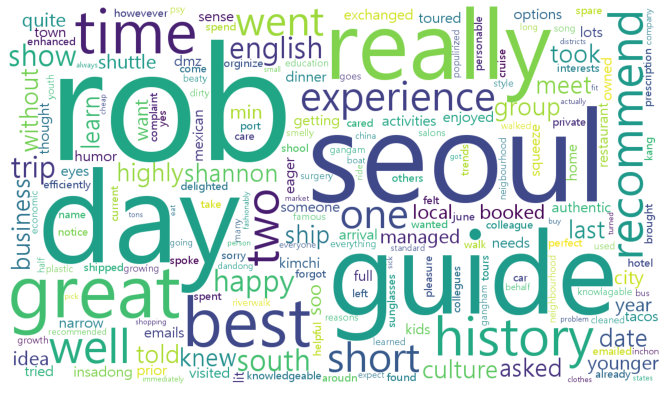

(None, <AxesSubplot:>)

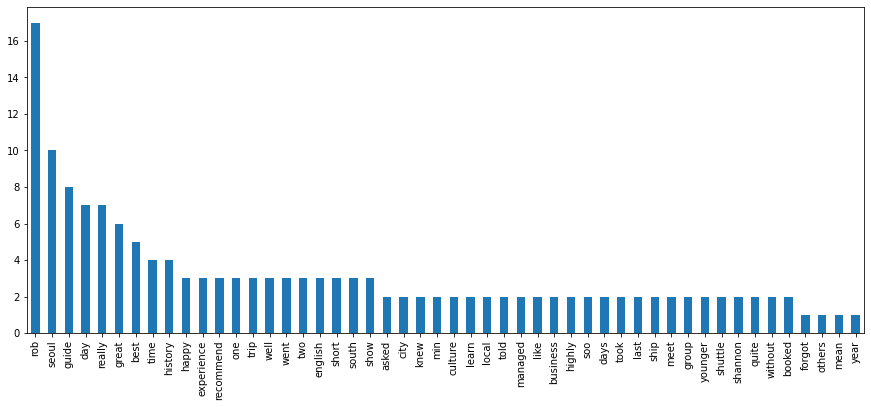

In [402]:
yearly_wordcount(positive_review, 2014)

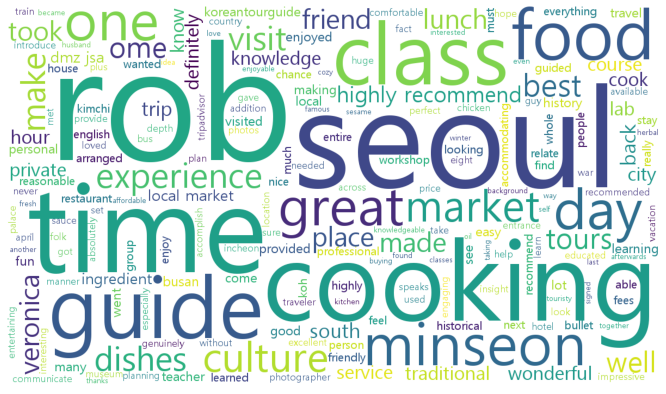

(None, <AxesSubplot:>)

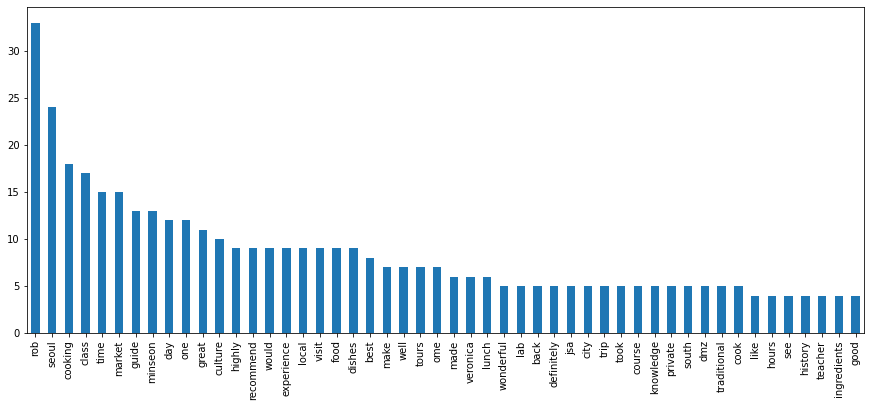

In [403]:
yearly_wordcount(positive_review, 2015)

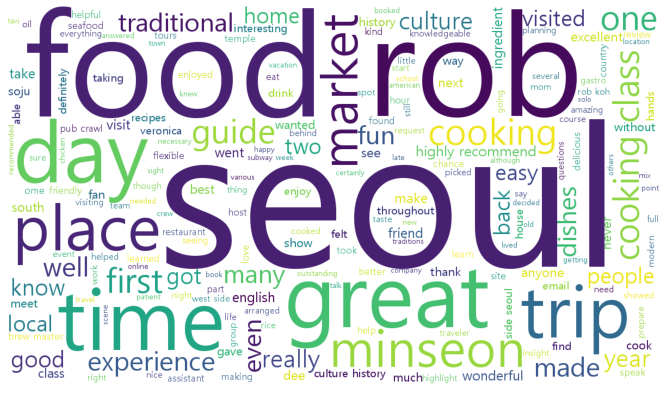

(None, <AxesSubplot:>)

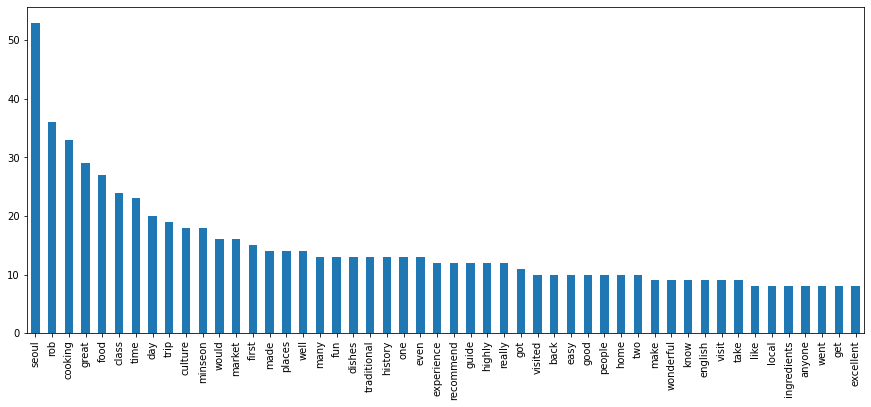

In [397]:
yearly_wordcount(positive_review, 2016)

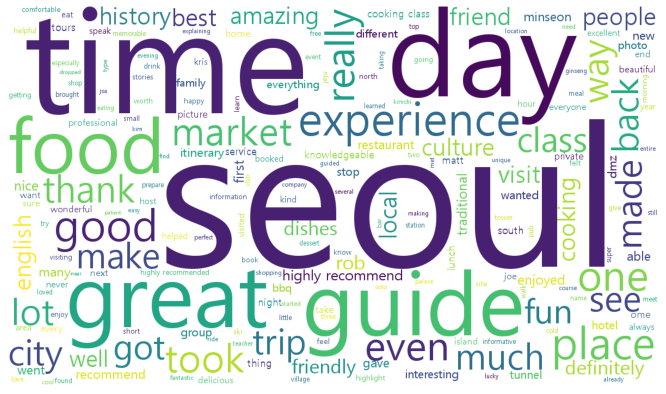

(None, <AxesSubplot:>)

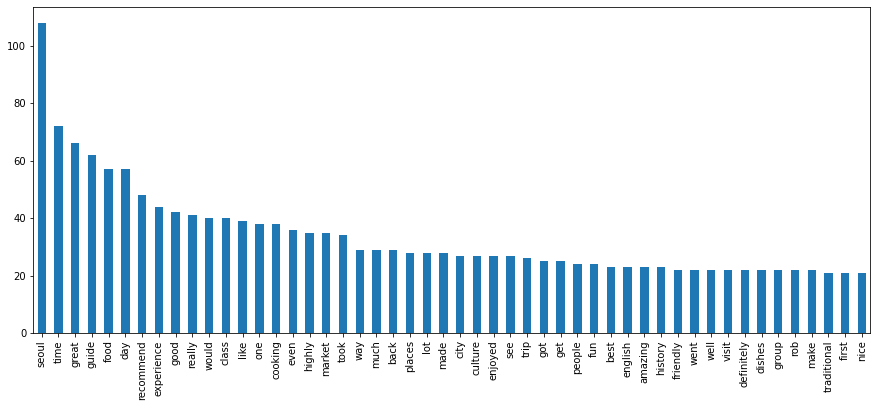

In [398]:
yearly_wordcount(positive_review, 2017)

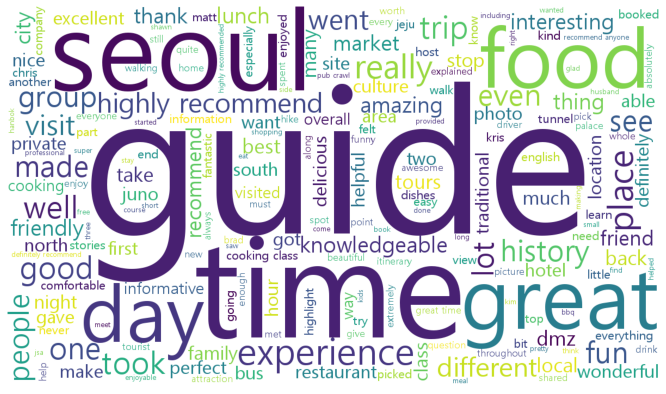

(None, <AxesSubplot:>)

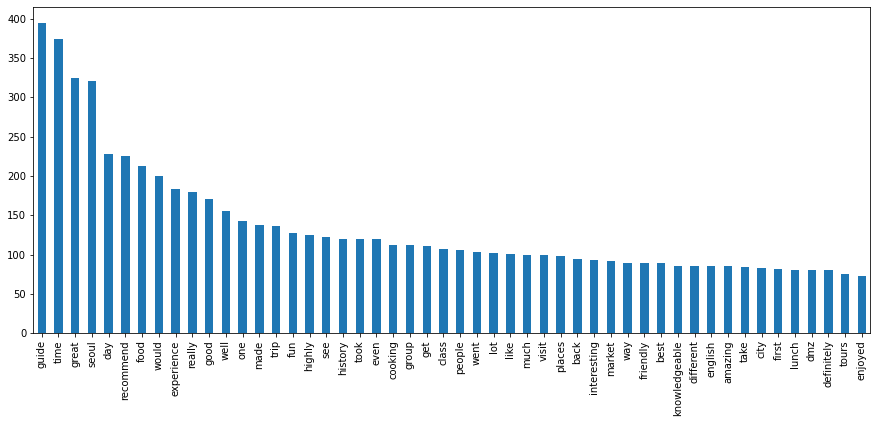

In [399]:
yearly_wordcount(positive_review, 2018)

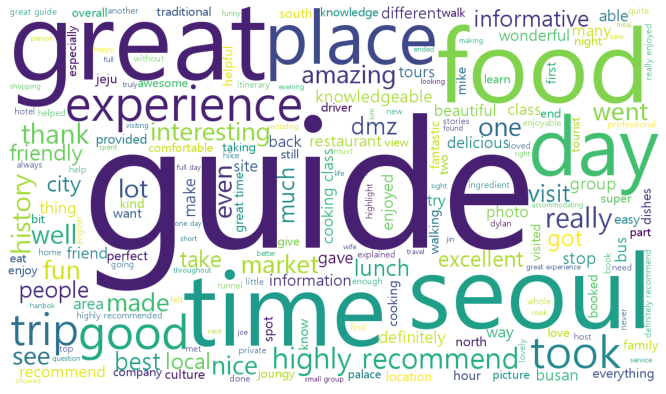

(None, <AxesSubplot:>)

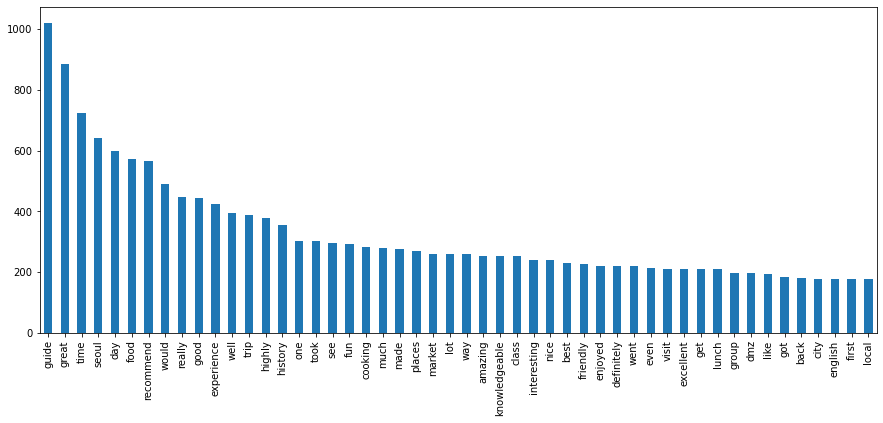

In [400]:
yearly_wordcount(positive_review, 2019)

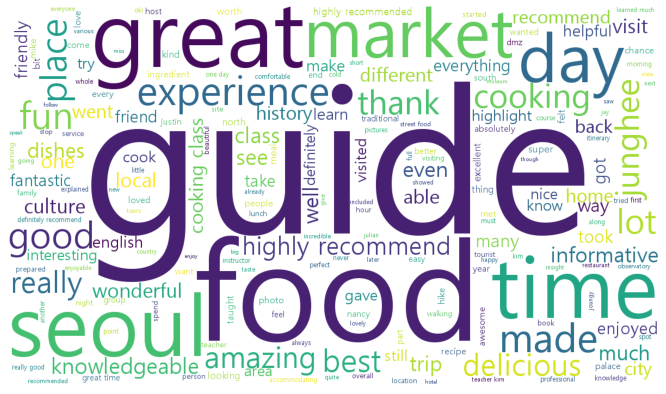

(None, <AxesSubplot:>)

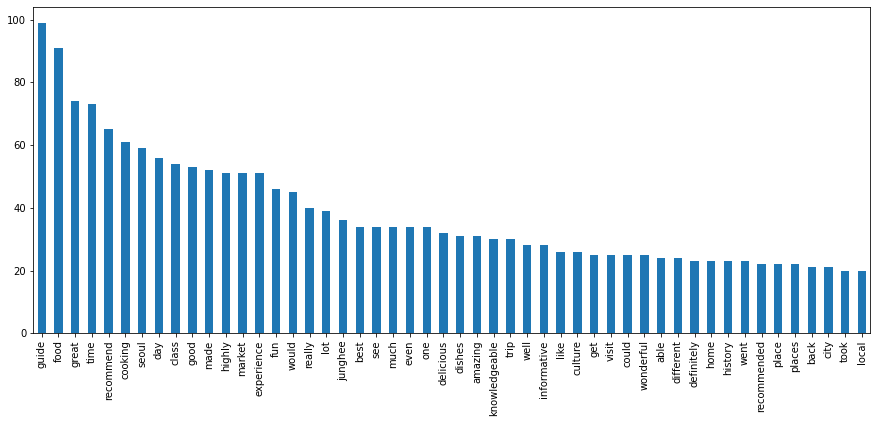

In [401]:
yearly_wordcount(positive_review, 2020)

## Negative review 결과 확인
- 2014~2016은 negative review 없음

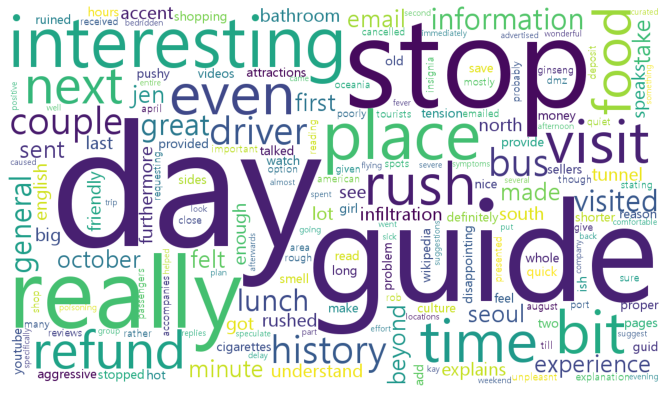

(None, <AxesSubplot:>)

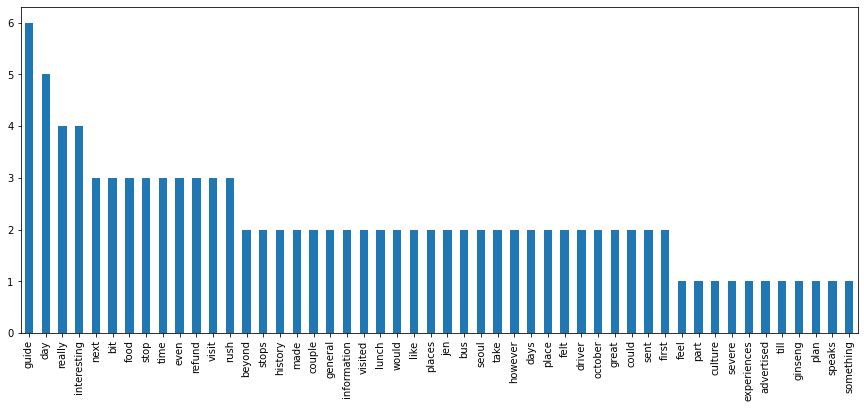

In [407]:
yearly_wordcount(negative_review, 2017)

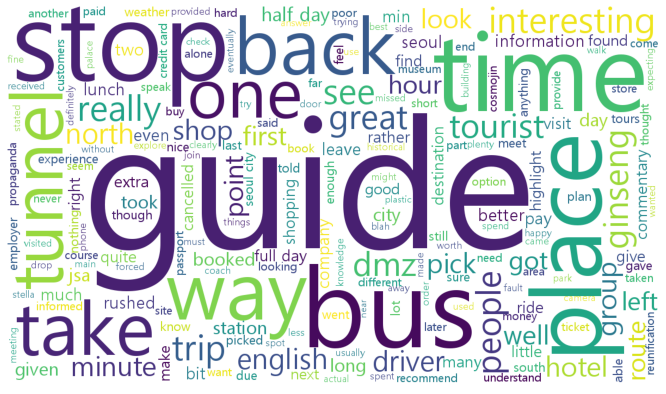

(None, <AxesSubplot:>)

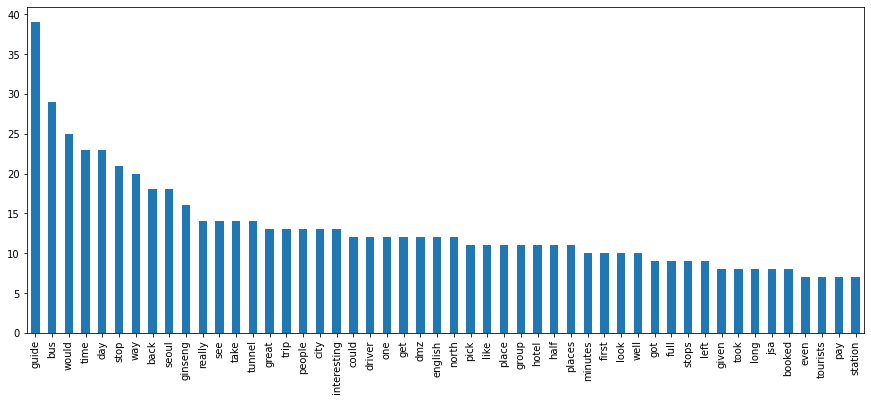

In [406]:
yearly_wordcount(negative_review, 2018)

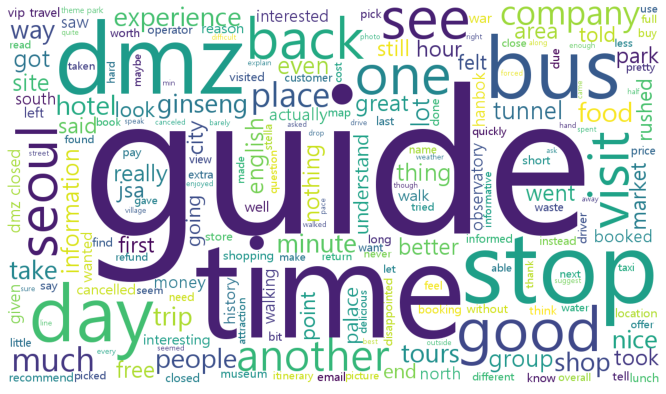

(None, <AxesSubplot:>)

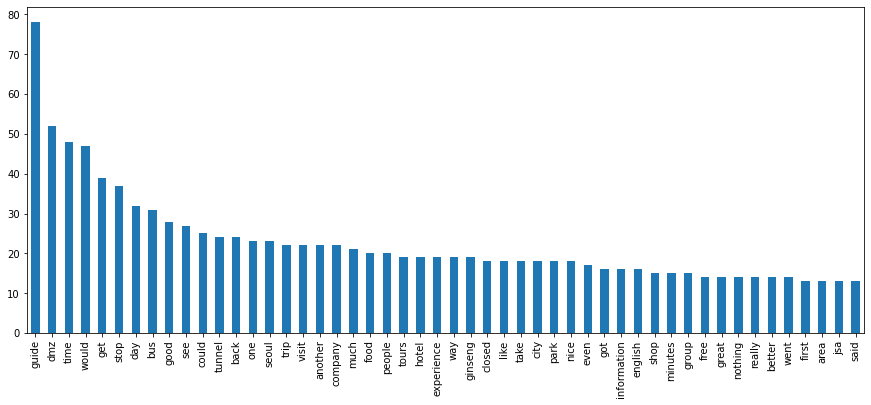

In [404]:
yearly_wordcount(negative_review, 2019)